In [2]:
# Register the catalyst magic
%load_ext catalyst


The catalyst extension is already loaded. To reload it, use:
  %reload_ext catalyst


In [3]:
# Setup matplotlib to display graphs inline in this Notebook
%matplotlib inline


Running in backtesting mode.


[2018-01-03 19:43:21.901098] INFO: run_algo: running algo in paper-trading mode
[2018-01-03 19:43:24.786675] INFO: exchange_algorithm: initialized trading algorithm in backtest mode
[2018-01-03 19:43:29.145767] INFO: Performance: Simulated 850 trading days out of 850.
[2018-01-03 19:43:29.147404] INFO: Performance: first open: 2015-03-02 00:00:00+00:00
[2018-01-03 19:43:29.148945] INFO: Performance: last close: 2017-06-28 23:59:00+00:00


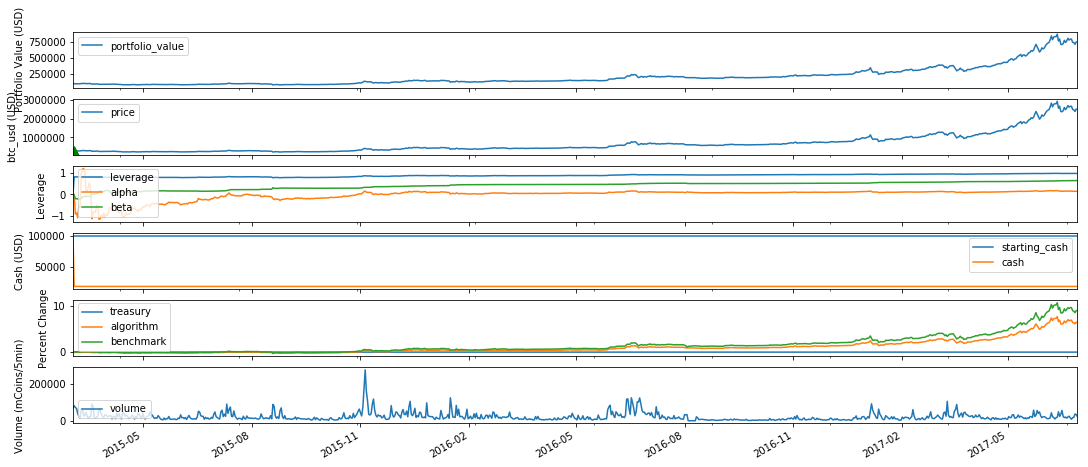

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,cash,ending_cash,ending_exposure,...,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return,volume,treasury,algorithm,benchmark
2015-03-02 23:59:00+00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,100000.000000,100000.000000,0.000000,...,100000.0,0.000000,0.000000,1,[],0.0208,67168.440498,0.0208,0.000000,0.000000
2015-03-03 23:59:00+00:00,0.019291,-0.001719,0.000000,0.060397,0.677953,-0.028454,-82000.196612,17999.803388,17999.803388,81828.340723,...,100000.0,0.000000,0.000000,2,"[{u'commission': None, u'amount': 288.38181752...",0.0212,81226.398297,0.0212,-0.001719,0.060397
2015-03-04 23:59:00+00:00,0.268353,-0.031768,-0.902481,0.111111,0.505876,-0.194745,0.000000,17999.803388,17999.803388,78823.402184,...,100000.0,81828.340723,81828.340723,3,[],0.0212,71521.587766,0.0212,-0.031768,0.111111
2015-03-05 23:59:00+00:00,0.288228,-0.019194,-0.859901,0.019842,1.025202,-0.198788,0.000000,17999.803388,17999.803388,80080.746909,...,100000.0,78823.402184,78823.402184,4,[],0.0211,66108.884634,0.0211,-0.019194,0.019842
2015-03-06 23:59:00+00:00,0.256028,-0.031681,-1.083361,0.043651,0.895850,-0.203731,0.000000,17999.803388,17999.803388,78832.053639,...,100000.0,80080.746909,80080.746909,5,[],0.0224,40276.571970,0.0224,-0.031681,0.043651
2015-03-07 23:59:00+00:00,0.254303,-0.021271,-0.521371,0.031746,0.813068,-0.220947,0.000000,17999.803388,17999.803388,79873.112000,...,100000.0,78832.053639,78832.053639,6,[],0.0224,22856.945604,0.0224,-0.021271,0.031746
2015-03-08 23:59:00+00:00,0.232174,-0.025251,-0.594399,0.031746,0.743200,-0.220122,0.000000,17999.803388,17999.803388,79475.145089,...,100000.0,79873.112000,79873.112000,7,[],0.0224,13853.794890,0.0224,-0.025251,0.031746
2015-03-09 23:59:00+00:00,0.349691,0.019189,0.965871,0.047619,0.690333,-0.186348,0.000000,17999.803388,17999.803388,83919.108900,...,100000.0,79475.145089,79475.145089,8,[],0.0220,62908.377680,0.0220,0.019189,0.047619
2015-03-10 23:59:00+00:00,0.327277,0.023861,1.177039,0.154762,0.820291,-0.107546,0.000000,17999.803388,17999.803388,84386.287445,...,100000.0,83919.108900,83919.108900,9,[],0.0214,67389.782195,0.0214,0.023861,0.154762
2015-03-11 23:59:00+00:00,0.311427,0.035339,1.208448,0.095238,0.847082,-0.109954,0.000000,17999.803388,17999.803388,85534.047078,...,100000.0,84386.287445,84386.287445,10,[],0.0211,25811.471790,0.0211,0.035339,0.095238


In [4]:
%%catalyst --start 2015-3-2 --end 2017-6-28 --capital-base 100000 -x bitfinex -c usd

from catalyst.finance.slippage import VolumeShareSlippage

from catalyst.api import (
    order_target_value,
    symbol,
    record,
    cancel_order,
    get_open_orders,
)

def initialize(context):
    context.ASSET_NAME = 'btc_usd'
    context.TARGET_HODL_RATIO = 0.8
    context.RESERVE_RATIO = 1.0 - context.TARGET_HODL_RATIO

    # For all trading pairs in the poloniex bundle, the default denomination
    # currently supported by Catalyst is 1/1000th of a full coin. Use this
    # constant to scale the price of up to that of a full coin if desired.
    context.TICK_SIZE = 1000.0

    context.is_buying = True
    context.asset = symbol(context.ASSET_NAME)

    context.i = 0

def handle_data(context, data):
    context.i += 1

    starting_cash = context.portfolio.starting_cash
    target_hodl_value = context.TARGET_HODL_RATIO * starting_cash
    reserve_value = context.RESERVE_RATIO * starting_cash

    # Cancel any outstanding orders
    orders = get_open_orders(context.asset) or []
    for order in orders:
        cancel_order(order)

    # Stop buying after passing the reserve threshold
    cash = context.portfolio.cash
    if cash <= reserve_value:
        context.is_buying = False

    # Retrieve current asset price from pricing data
    price = data.current(context.asset, 'price')

    # Check if still buying and could (approximately) afford another purchase
    if context.is_buying and cash > price:
        # Place order to make position in asset equal to target_hodl_value
        order_target_value(
            context.asset,
            target_hodl_value,
            limit_price=price*1.1,
        )

    record(
        price=price,
        volume=data.current(context.asset, 'volume'),
        cash=cash,
        starting_cash=context.portfolio.starting_cash,
        leverage=context.account.leverage,
    )

def analyze(context=None, results=None):
    import matplotlib.pyplot as plt

    # Plot the portfolio and asset data.
    ax1 = plt.subplot(611)
    results[['portfolio_value']].plot(ax=ax1)
    ax1.set_ylabel('Portfolio Value (USD)')

    ax2 = plt.subplot(612, sharex=ax1)
    ax2.set_ylabel('{asset} (USD)'.format(asset=context.ASSET_NAME))
    (context.TICK_SIZE * results[['price']]).plot(ax=ax2)

    trans = results.ix[[t != [] for t in results.transactions]]
    buys = trans.ix[
        [t[0]['amount'] > 0 for t in trans.transactions]
    ]
    ax2.plot(
        buys.index,
        context.TICK_SIZE * results.price[buys.index],
        '^',
        markersize=10,
        color='g',
    )

    ax3 = plt.subplot(613, sharex=ax1)
    results[['leverage', 'alpha', 'beta']].plot(ax=ax3)
    ax3.set_ylabel('Leverage ')

    ax4 = plt.subplot(614, sharex=ax1)
    results[['starting_cash', 'cash']].plot(ax=ax4)
    ax4.set_ylabel('Cash (USD)')

    results[[
        'treasury',
        'algorithm',
        'benchmark',
    ]] = results[[
        'treasury_period_return',
        'algorithm_period_return',
        'benchmark_period_return',
    ]]

    ax5 = plt.subplot(615, sharex=ax1)
    results[[
        'treasury',
        'algorithm',
        'benchmark',
    ]].plot(ax=ax5)
    ax5.set_ylabel('Percent Change')

    ax6 = plt.subplot(616, sharex=ax1)
    results[['volume']].plot(ax=ax6)
    ax6.set_ylabel('Volume (mCoins/5min)')

    plt.legend(loc=3)

    # Show the plot.
    plt.gcf().set_size_inches(18, 8)
    plt.show()

[2018-01-03 20:25:52.730773] INFO: run_algo: running algo in paper-trading mode
[2018-01-03 20:25:55.336648] WARNING: Loader: Refusing to download new treasury data because a download succeeded at 2018-01-03 19:26:30+00:00.
[2018-01-03 20:25:55.339741] INFO: exchange_algorithm: initialized trading algorithm in backtest mode


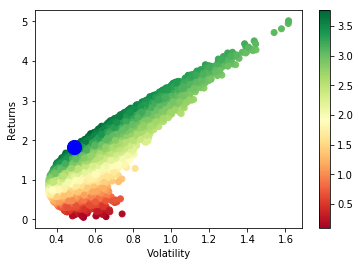

r                                 1.838728
stdev                             0.488858
sharpe                            3.761272
TradingPair(374465 [btc_usdt])    0.250806
TradingPair(23347 [eth_usdt])     0.003272
TradingPair(19201 [ltc_usdt])     0.017687
TradingPair(3314 [dash_usdt])     0.548757
TradingPair(748770 [xmr_usdt])    0.179478
Name: 31218, dtype: float64


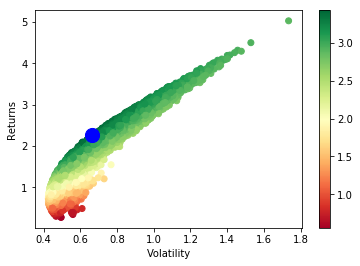

r                                 2.273484
stdev                             0.663914
sharpe                            3.424366
TradingPair(374465 [btc_usdt])    0.154908
TradingPair(23347 [eth_usdt])     0.005563
TradingPair(19201 [ltc_usdt])     0.008166
TradingPair(3314 [dash_usdt])     0.579977
TradingPair(748770 [xmr_usdt])    0.251386
Name: 4320, dtype: float64


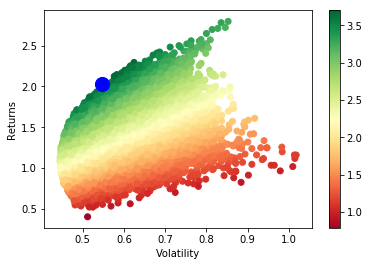

r                                 2.026730
stdev                             0.547505
sharpe                            3.701754
TradingPair(374465 [btc_usdt])    0.318703
TradingPair(23347 [eth_usdt])     0.008135
TradingPair(19201 [ltc_usdt])     0.082843
TradingPair(3314 [dash_usdt])     0.578335
TradingPair(748770 [xmr_usdt])    0.011983
Name: 21405, dtype: float64


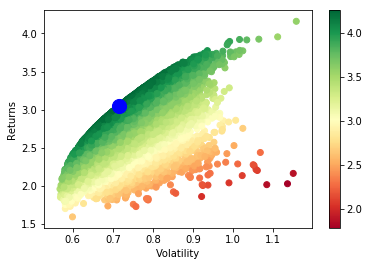

r                                 3.043706
stdev                             0.714733
sharpe                            4.258523
TradingPair(374465 [btc_usdt])    0.330763
TradingPair(23347 [eth_usdt])     0.153574
TradingPair(19201 [ltc_usdt])     0.260475
TradingPair(3314 [dash_usdt])     0.186294
TradingPair(748770 [xmr_usdt])    0.068894
Name: 49267, dtype: float64


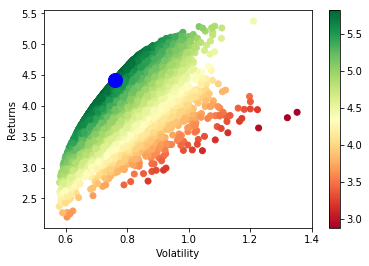

r                                 4.424997
stdev                             0.760432
sharpe                            5.819060
TradingPair(374465 [btc_usdt])    0.288942
TradingPair(23347 [eth_usdt])     0.163393
TradingPair(19201 [ltc_usdt])     0.260274
TradingPair(3314 [dash_usdt])     0.105974
TradingPair(748770 [xmr_usdt])    0.181417
Name: 17015, dtype: float64


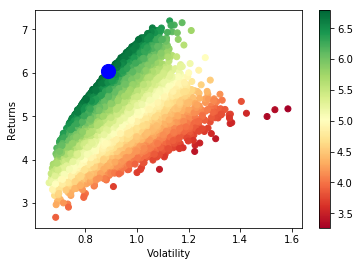

r                                 6.041732
stdev                             0.889747
sharpe                            6.790395
TradingPair(374465 [btc_usdt])    0.235769
TradingPair(23347 [eth_usdt])     0.149961
TradingPair(19201 [ltc_usdt])     0.428103
TradingPair(3314 [dash_usdt])     0.185913
TradingPair(748770 [xmr_usdt])    0.000254
Name: 21958, dtype: float64


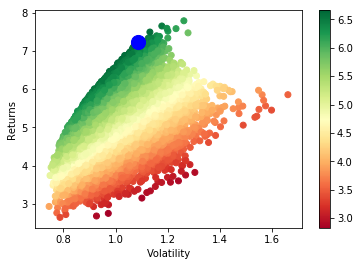

r                                 7.233454
stdev                             1.086169
sharpe                            6.659601
TradingPair(374465 [btc_usdt])    0.257550
TradingPair(23347 [eth_usdt])     0.148664
TradingPair(19201 [ltc_usdt])     0.556386
TradingPair(3314 [dash_usdt])     0.029353
TradingPair(748770 [xmr_usdt])    0.008046
Name: 13099, dtype: float64


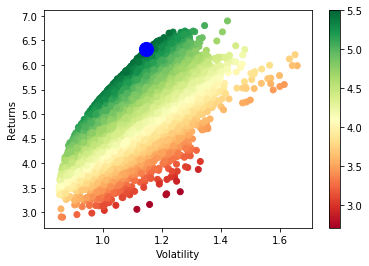

[2018-01-03 20:26:35.407400] INFO: Performance: Simulated 228 trading days out of 228.


r                                 6.315100
stdev                             1.148055
sharpe                            5.500696
TradingPair(374465 [btc_usdt])    0.257710
TradingPair(23347 [eth_usdt])     0.227699
TradingPair(19201 [ltc_usdt])     0.444781
TradingPair(3314 [dash_usdt])     0.067550
TradingPair(748770 [xmr_usdt])    0.002259
Name: 32498, dtype: float64


[2018-01-03 20:26:35.408802] INFO: Performance: first open: 2017-01-01 00:00:00+00:00
[2018-01-03 20:26:35.410366] INFO: Performance: last close: 2017-08-16 23:59:00+00:00


NameError: global name '__file__' is not defined

In [6]:
from __future__ import division
import os
import pytz
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import datetime

from catalyst.api import record, symbol, symbols, order_target_percent
from catalyst.utils.run_algo import run_algorithm

np.set_printoptions(threshold='nan', suppress=True)


def initialize(context):
   # Portfolio assets list
   context.assets = symbols('btc_usdt', 'eth_usdt', 'ltc_usdt', 'dash_usdt',
                            'xmr_usdt')
   context.nassets = len(context.assets)
   # Set the time window that will be used to compute expected return
   # and asset correlations
   context.window = 180
   # Set the number of days between each portfolio rebalancing
   context.rebalance_period = 30
   context.i = 0


def handle_data(context, data):
   # Only rebalance at the beggining of the algorithm execution and
   # every multiple of the rebalance period
   if context.i == 0 or context.i%context.rebalance_period == 0:
       n = context.window
       prices = data.history(context.assets, fields='price',
                             bar_count=n+1, frequency='1d')
       pr = np.asmatrix(prices)
       t_prices = prices.iloc[1:n+1]
       t_val = t_prices.values
       tminus_prices = prices.iloc[0:n]
       tminus_val = tminus_prices.values
       # Compute daily returns (r)
       r = np.asmatrix(t_val/tminus_val-1)
       # Compute the expected returns of each asset with the average
       # daily return for the selected time window
       m = np.asmatrix(np.mean(r, axis=0))
       # ###
       stds = np.std(r, axis=0)
       # Compute excess returns matrix (xr)
       xr = r - m
       # Matrix algebra to get variance-covariance matrix
       cov_m = np.dot(np.transpose(xr),xr)/n
       # Compute asset correlation matrix (informative only)
       corr_m = cov_m/np.dot(np.transpose(stds),stds)

       # Define portfolio optimization parameters
       n_portfolios = 50000
       results_array = np.zeros((3+context.nassets,n_portfolios))
       for p in xrange(n_portfolios):
           weights = np.random.random(context.nassets)
           weights /= np.sum(weights)
           w = np.asmatrix(weights)
           p_r = np.sum(np.dot(w,np.transpose(m)))*365
           p_std = np.sqrt(np.dot(np.dot(w,cov_m),np.transpose(w)))*np.sqrt(365)

           #store results in results array
           results_array[0,p] = p_r
           results_array[1,p] = p_std
           #store Sharpe Ratio (return / volatility) - risk free rate element
           #excluded for simplicity
           results_array[2,p] = results_array[0,p] / results_array[1,p]
           i = 0
           for iw in weights:
               results_array[3+i,p] = weights[i]
               i += 1

       #convert results array to Pandas DataFrame
       results_frame = pd.DataFrame(np.transpose(results_array),
                          columns=['r','stdev','sharpe']+context.assets)
       #locate position of portfolio with highest Sharpe Ratio
       max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
       #locate positon of portfolio with minimum standard deviation
       min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

       #order optimal weights for each asset
       for asset in context.assets:
           if data.can_trade(asset):
               order_target_percent(asset, max_sharpe_port[asset])

       #create scatter plot coloured by Sharpe Ratio
       plt.scatter(results_frame.stdev,results_frame.r,c=results_frame.sharpe,cmap='RdYlGn')
       plt.xlabel('Volatility')
       plt.ylabel('Returns')
       plt.colorbar()
       #plot red star to highlight position of portfolio with highest Sharpe Ratio
       plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker='o',color='b',s=200)
       #plot green star to highlight position of minimum variance portfolio
       plt.show()
       print(max_sharpe_port)
       record(pr=pr,r=r, m=m, stds=stds ,max_sharpe_port=max_sharpe_port, corr_m=corr_m)
   context.i += 1


def analyze(context=None, results=None):
   # Form DataFrame with selected data
   data = results[['pr','r','m','stds','max_sharpe_port','corr_m','portfolio_value']]

   # Save results in CSV file
   filename = os.path.splitext(os.path.basename(__file__))[0]
   data.to_csv(filename + '.csv')


# Bitcoin data is available from 2015-3-2. Dates vary for other tokens.
start = datetime(2017, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime(2017, 8, 16, 0, 0, 0, 0, pytz.utc)
results = run_algorithm(initialize=initialize,
                        handle_data=handle_data,
                        analyze=analyze,
                        start=start,
                        end=end,
                        exchange_name='poloniex',
                        capital_base=100000, )